Aufgabe 39.

In dieser Aufgabe verwenden Sie den Datensatz Helikopter. Er enthält die Flugzeiten von Papier-Helikoptern, die folgendermaßen gebaut wurden.

In [2]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [4]:
df = pd.read_csv('../data/Helicopter.txt')
df.head()

,Weight,Wing width,Wing Length,Body Length,Flight Time
0,2,4,8,13,1.65
1,2,2,8,13,1.56
2,2,4,8,8,1.87
3,2,4,8,13,1.89
4,2,2,8,13,1.93


a) Führen Sie eine explorative Datenanalyse aller Variablen durch. Was fällt Ihnen
auf?

In [6]:
df.describe().round(2)

,Weight,Wing width,Wing Length,Body Length,Flight Time
count,32.00,32.00,32.00,32.00,32.00
mean,1.50,3.00,10.50,10.50,2.40
std,0.51,1.02,2.54,2.54,0.45
min,1.00,2.00,8.00,8.00,1.56
25%,1.00,2.00,8.00,8.00,2.05
50%,1.50,3.00,10.50,10.50,2.31
75%,2.00,4.00,13.00,13.00,2.78
max,2.00,4.00,13.00,13.00,3.20


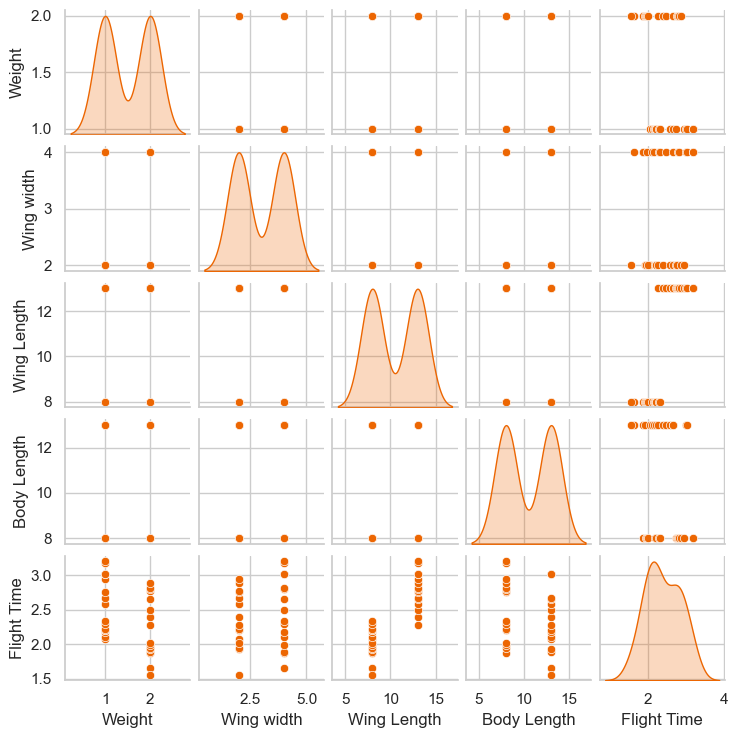

In [10]:
sns.pairplot(df, diag_kind='kde', height=1.5);

In [11]:
show_missing_values(df)

,Column Name,Min,Max,n Unique,NaN count,NaN percentage,dtype
S. No.,,,,,,,
1,Weight,1,2,2,0,0.0%,int64
2,Wing width,2,4,2,0,0.0%,int64
3,Wing Length,8,13,2,0,0.0%,int64
4,Body Length,8,13,2,0,0.0%,int64
5,Flight Time,1.56,3.2,32,0,0.0%,float64


Alle Variablen haben nur 2 Ausprägungen, ich glaube es würde schon Sinn wenn die Werte einfach 0 und 1 wären, dann könnte man sie einfach als Binär behandeln.

In [14]:
df.columns

Index(['Weight', 'Wing width', 'Wing Length', 'Body Length', 'Flight Time'], dtype='object')

In [16]:
df.Weight.value_counts()

Weight
2    16
1    16
Name: count, dtype: int64

In [17]:
df.Weight = (df.Weight == 1).astype(int)
df.Weight.value_counts()

Weight
0    16
1    16
Name: count, dtype: int64

In [18]:
df['Wing width'].value_counts()

Wing width
4    16
2    16
Name: count, dtype: int64

In [19]:
df['Wing width'] = (df['Wing width'] == 2).astype(int)
df['Wing width'].value_counts()

Wing width
0    16
1    16
Name: count, dtype: int64

In [20]:
df['Wing Length'].value_counts()

Wing Length
8     16
13    16
Name: count, dtype: int64

In [21]:
df['Wing Length'] = (df['Wing Length'] == 8).astype(int)
df['Wing Length'].value_counts()

Wing Length
1    16
0    16
Name: count, dtype: int64

In [22]:
df['Body Length'] = (df['Body Length'] == 8).astype(int)
df['Body Length'].value_counts()

Body Length
0    16
1    16
Name: count, dtype: int64

b) Passen Sie ein lineares Regressionsmodell zur Vorhersage der Flugzeit an.

In [24]:
X = df.drop(columns=['Flight Time'])
y = df['Flight Time']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Flight Time   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     87.47
Date:                Wed, 14 May 2025   Prob (F-statistic):           4.75e-15
Time:                        13:52:25   Log-Likelihood:                 22.909
No. Observations:                  32   AIC:                            -35.82
Df Residuals:                      27   BIC:                            -28.49
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.5747      0.051     50.591      

c) Interpretieren Sie die Koeffizienten aller Faktoren.

Codierung:
- `Weight`: (2: 0, 1: 1)
- `Wing width`: (4: 0, 2: 1)
- `Wing Length`: (13:0, 8: 1)
- `Body Length`: (13:0, 8: 1)

- `Weight==1` heißt 0.31 Einheit Flugzeit *mehr* als `Weight==2`

- `Wing width==2` heißt 0.12 Einheit Flugzeit *weniger* als `Wing width==4`

- `Wing Length==8` heißt 0.74 Einheit Flugzeit *weniger* als `Wing Length==13`

- `Body Length==8` heißt 0.21 Einheit Flugzeit *mehr* als `Body Length==13`

d) Sind die Residuen normalverteilt?

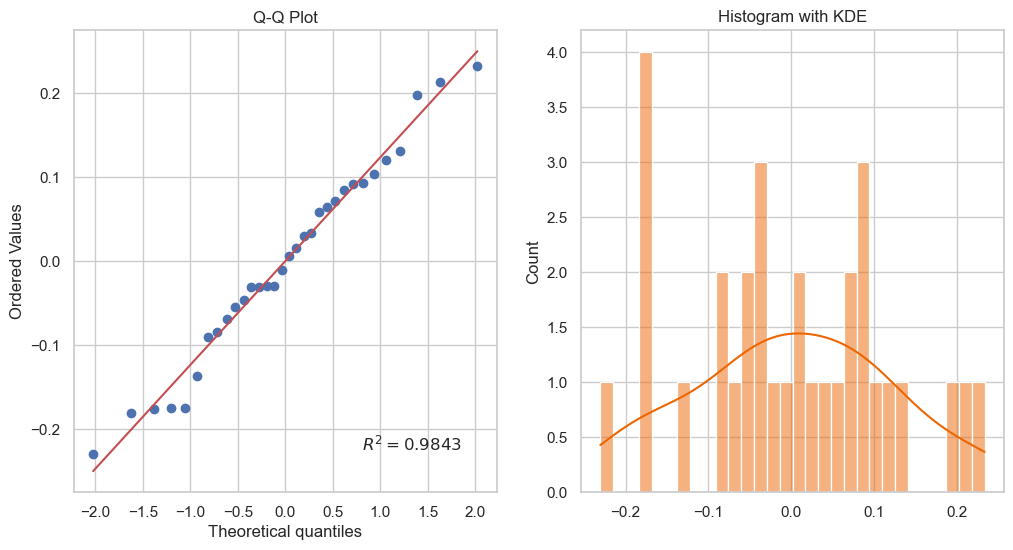

Shapiro-Wilk normality test: p-value = 0.691974974929561
D'Agostino's K^2 normality test: p-value = 0.8037836223723644
Kolmogorov-Smirnov normality test: p-value = 0.966160664502456
Anderson-Darling normality test: statistic = 0.22247012264131882, critical value = 0.715


In [25]:
check_normality(model.resid)

Ja, sind sie normalverteilt.

e) Nutzen Sie das Modell, um den Helikopter mit der größten vorhergesagten Flugzeit zu bestimmen. Was fällt dabei bezüglich der Faktorstufen auf?

In [37]:
model.predict([1, 1, 0, 0, 1])

array([3.1084375])

- Weight = 1
- Wing width = 4
- Wing Length = 13
- Body Length = 8

Wenn die Flügel größer sind und das Gewicht und die Länge kleiner sind, dauert es am Längsten.

In [40]:
model.predict([1, 0, 1, 1, 0])

array([1.6971875])

- Weight = 2 NICHT 1
- Wing width = 2 NICHT 4
- Wing Length = 8 NICHT 13
- Body Length = 13 NICHT 8

In [42]:
df.y_pred.value_counts().sort_index()

y_pred
1.697188    2
1.825313    2
1.916563    2
2.011563    2
2.044688    2
2.139688    2
2.230938    2
2.359062    2
2.446563    2
2.574688    2
2.665938    2
2.760938    2
2.794062    2
2.889063    2
2.980312    2
3.108437    2
Name: count, dtype: int64

### Frage: 
Macht es Sinn hier die Werte als 0 und 1 zu kodieren?